In [211]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Data manipulation and visualization settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Machine Learning libraries
from sklearn import metrics, preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Additional datetime and regular expression libraries
import datetime
import re

In [177]:
 app=pd.read_csv("/content/googleplaystore.csv")
user=pd.read_csv("/content/googleplaystore_user_reviews.csv")
user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [178]:
app.drop_duplicates(inplace=True)#drop dulpicates
user.drop_duplicates(inplace=True)#drop dulpicates
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



-Drop last 3 columns as they diodn't provide much insight as we are working on User Sentiment analysis
-Need to make all sizes in same type and make it int/float value only so we can work on it easier
-Missing values in Rating


In [179]:
 app = app.iloc[:, :-3] #drop laast 3 columns.
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [180]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
dtypes: float64(1), object(9)
memory usage: 890.1+ KB


Review have object Date type, change it to float

In [181]:
# Convert 'Rating' column to float data type
app['Rating'] = app['Rating'].astype(float)


In [182]:

# Function to convert size values to MB
def convert_to_mb(size):
    if pd.isnull(size):
        return None
    elif isinstance(size, float):
        return size
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'K' in size:
        return float(size.replace('K', '')) / 1024  # Convert KB to MB
    elif 'G' in size:
        return float(size.replace('G', '')) * 1024  # Convert GB to MB
    else:
        try:
            return float(size)  # Convert other cases to float
        except ValueError:
            return None  # Handle unexpected cases where conversion fails

# Replace "Varies with device" with NaN in 'Size' column
app['Size'] = app['Size'].replace('Varies with device', np.nan)

# Convert the 'Size' column to MB using the convert_to_mb function
app['Size_MB'] = app['Size'].apply(convert_to_mb)

# Fill NaN


-The reviews column had one non int values 3M that was converted to integer and whole columns Dtype as int

-installs can be easily changed to int if we get rid of '+' etc part and making it int

-Price has a $ or USD part in it, getting rid of it and making it int as we know all prices are in USD and makes Data more easier to work with


In [183]:

# Apply a lambda function to convert 'Reviews' to integers
app['Reviews'] = app['Reviews'].apply(lambda x: int(float(x.replace('M', '')) * 1e6) if 'M' in x else int(x))

# Convert 'Reviews' column to float data type
app['Reviews'] = app['Reviews'].astype(int)

app.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            8832 non-null   object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Size_MB         8516 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 971.1+ KB


In [184]:
app = app[app['Installs'] != 'Free']
app = app[app['Installs'] != 'Paid']
app['Installs'] = app['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
app['Installs'] = app['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
app['Installs'] = app['Installs'].apply(lambda x: int(x))
# Remove 'USD' suffix and convert 'Price' column to float
app['Price'] = app['Price'].str.replace('$', '').astype(float)

# Replace 'Varies with device' with NaN in 'Size' column
#app['Size_MB'] = app['Size_MB'].replace('Varies with device', np.nan)

# Rename 'Size_MB' column to 'Size'
#app = app.rename(columns={'Size_MB': 'Size'})

app.head()


<ipython-input-184-4cd7a8e29a62>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app['Price'] = app['Price'].str.replace('$', '').astype(float)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2.8


In [185]:
app = app.drop('Size', axis=1)

app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Installs        10357 non-null  int64  
 5   Type            10356 non-null  object 
 6   Price           10357 non-null  float64
 7   Content Rating  10357 non-null  object 
 8   Genres          10357 non-null  object 
 9   Size_MB         8516 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 890.1+ KB


In [186]:

# Rename 'Size_MB' column to 'Size'
app = app.rename(columns={'Size_MB': 'Size'})

app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Installs        10357 non-null  int64  
 5   Type            10356 non-null  object 
 6   Price           10357 non-null  float64
 7   Content Rating  10357 non-null  object 
 8   Genres          10357 non-null  object 
 9   Size            8516 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 890.1+ KB


In [187]:
 average_rating = app['Rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

# Most Installations
#app['Installs'] = app['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
most_installs_category = app.groupby('Category')['Installs'].sum().idxmax()

#print(f"Category with the Most Space Consumption: {most_space_category}")
print(f"Category with the Most Installations: {most_installs_category}")

#print(f"Category with the Most Reviews: {most_reviews_category}")


Average Rating: 4.19
Category with the Most Installations: GAME


In [188]:
print("Max price:", app.loc[app['Price'].idxmax()])
print("Price distribution:", app['Price'].describe())

Max price: App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Installs                             10000
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Size                                   7.3
Name: 4367, dtype: object
Price distribution: count    10357.000000
mean         1.030800
std         16.278625
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64


Average app price:$1

Max app price:$400

App name @$400:  I'm Rich - Trump Edition

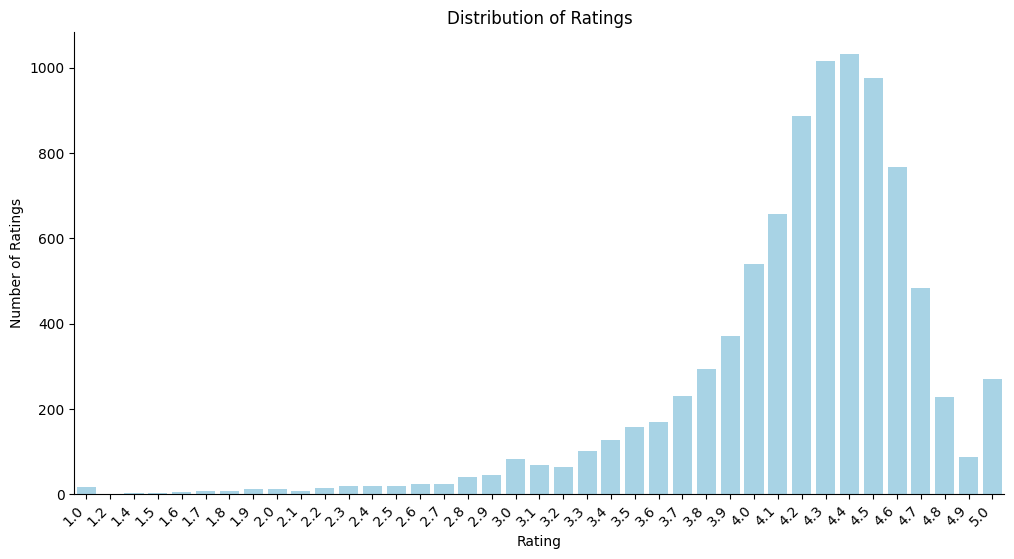

In [189]:
# Assuming 'app' is your DataFrame
ratings_count = app['Rating'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=ratings_count.index, y=ratings_count.values, color='skyblue', alpha=0.8)
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()

<ipython-input-190-3d2282615c20>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=app, palette='viridis')


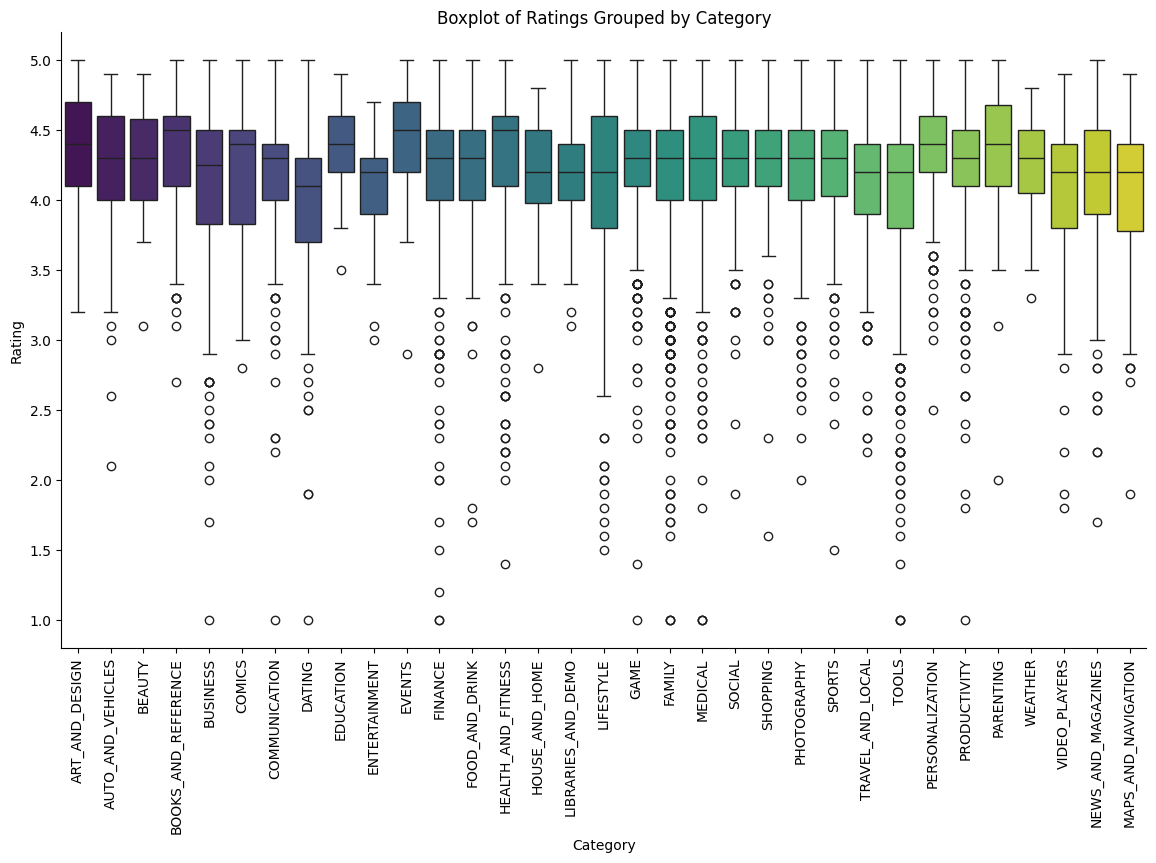

In [190]:


# Assuming 'app' is your DataFrame
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Rating', data=app, palette='viridis')
plt.title('Boxplot of Ratings Grouped by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
sns.despine()  # Remove the top and right spines for a cleaner look
plt.show()


<ipython-input-191-9ade195cd289>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis', order=category_counts.index)
<ipython-input-191-9ade195cd289>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=app, palette='viridis', order=category_counts.index)


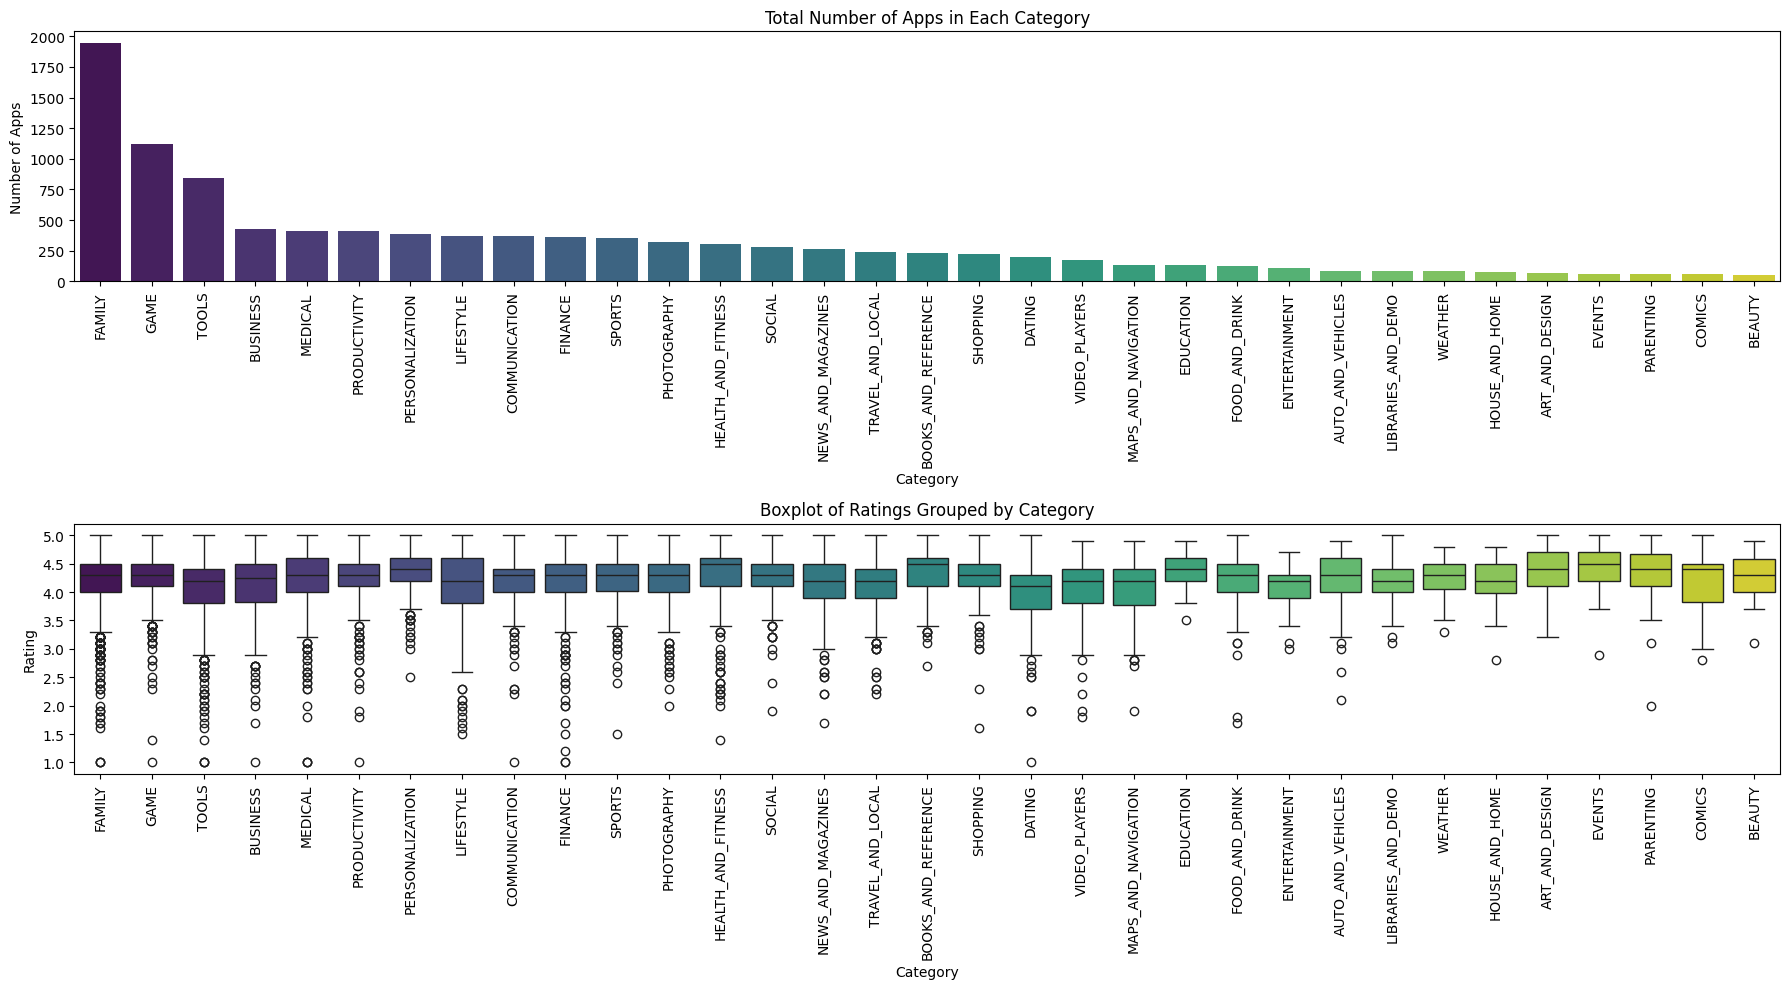

In [191]:
# Assuming 'app' is your DataFrame
plt.figure(figsize=(18, 10))

# Plotting total number of apps per category
plt.subplot(2, 1, 1)
category_counts = app['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis', order=category_counts.index)
plt.title('Total Number of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)

# Plotting boxplot of ratings grouped by category
plt.subplot(2, 1, 2)
sns.boxplot(x='Category', y='Rating', data=app, palette='viridis', order=category_counts.index)
plt.title('Boxplot of Ratings Grouped by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


### Inference
***
**While Gaming Apps have the Most reviews & Installations
***

<ipython-input-192-2385d77dc847>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = app.corr()


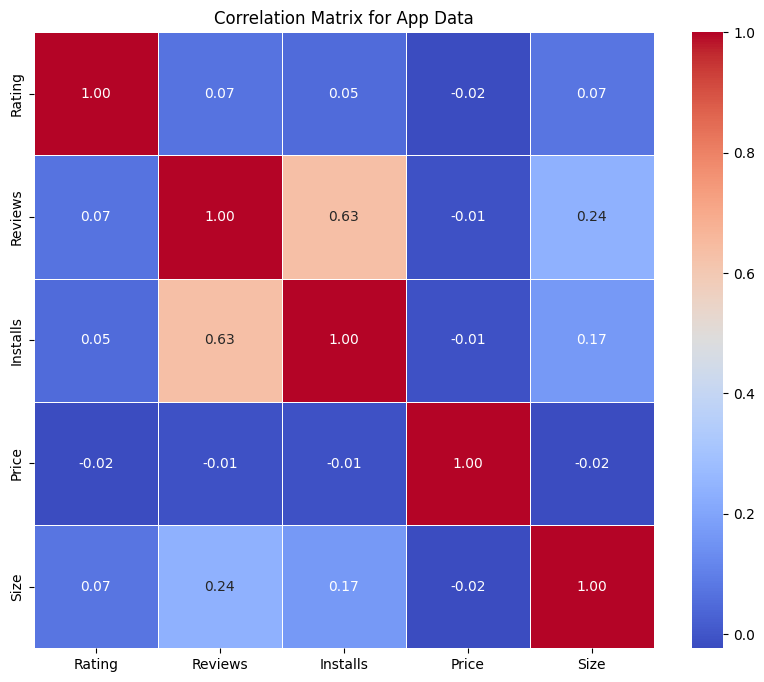

In [192]:
# Assuming 'app' is your DataFrame
correlation_matrix = app.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for App Data')
plt.show()


Reviews and INstalls are hightly correlated

In [193]:
'''# Select only numeric columns
numeric_columns = app.select_dtypes(include=['float64', 'int64'])

# Plot histograms for numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(app[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()
'''

"# Select only numeric columns\nnumeric_columns = app.select_dtypes(include=['float64', 'int64'])\n\n# Plot histograms for numeric columns\nfor column in numeric_columns.columns:\n    plt.figure(figsize=(6, 4))\n    plt.hist(app[column], bins=20, color='skyblue', edgecolor='black')\n    plt.xlabel(column)\n    plt.ylabel('Frequency')\n    plt.title(f'Distribution of {column}')\n    plt.show()\n"

In [194]:
'''
# Ratings Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Rating', data=app)
plt.title('Boxplot of Ratings by App Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

# Size Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Size', data=app)
plt.title('Boxplot of Size by App Type')
plt.xlabel('Type')
plt.ylabel('Size (MB)')
plt.show()
'''

"\n# Ratings Boxplot\nplt.figure(figsize=(8, 6))\nsns.boxplot(x='Type', y='Rating', data=app)\nplt.title('Boxplot of Ratings by App Type')\nplt.xlabel('Type')\nplt.ylabel('Rating')\nplt.show()\n\n# Size Boxplot\nplt.figure(figsize=(8, 6))\nsns.boxplot(x='Type', y='Size', data=app)\nplt.title('Boxplot of Size by App Type')\nplt.xlabel('Type')\nplt.ylabel('Size (MB)')\nplt.show()\n"

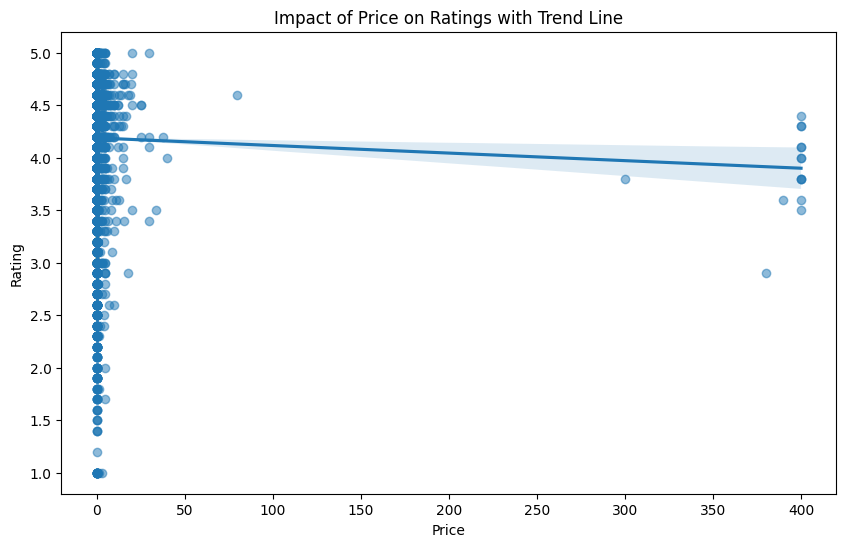

In [195]:

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Rating', data=app, scatter_kws={'alpha':0.5})
plt.title('Impact of Price on Ratings with Trend Line')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

Paid apps have less bad reviews(<3)

In [196]:
user.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [197]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


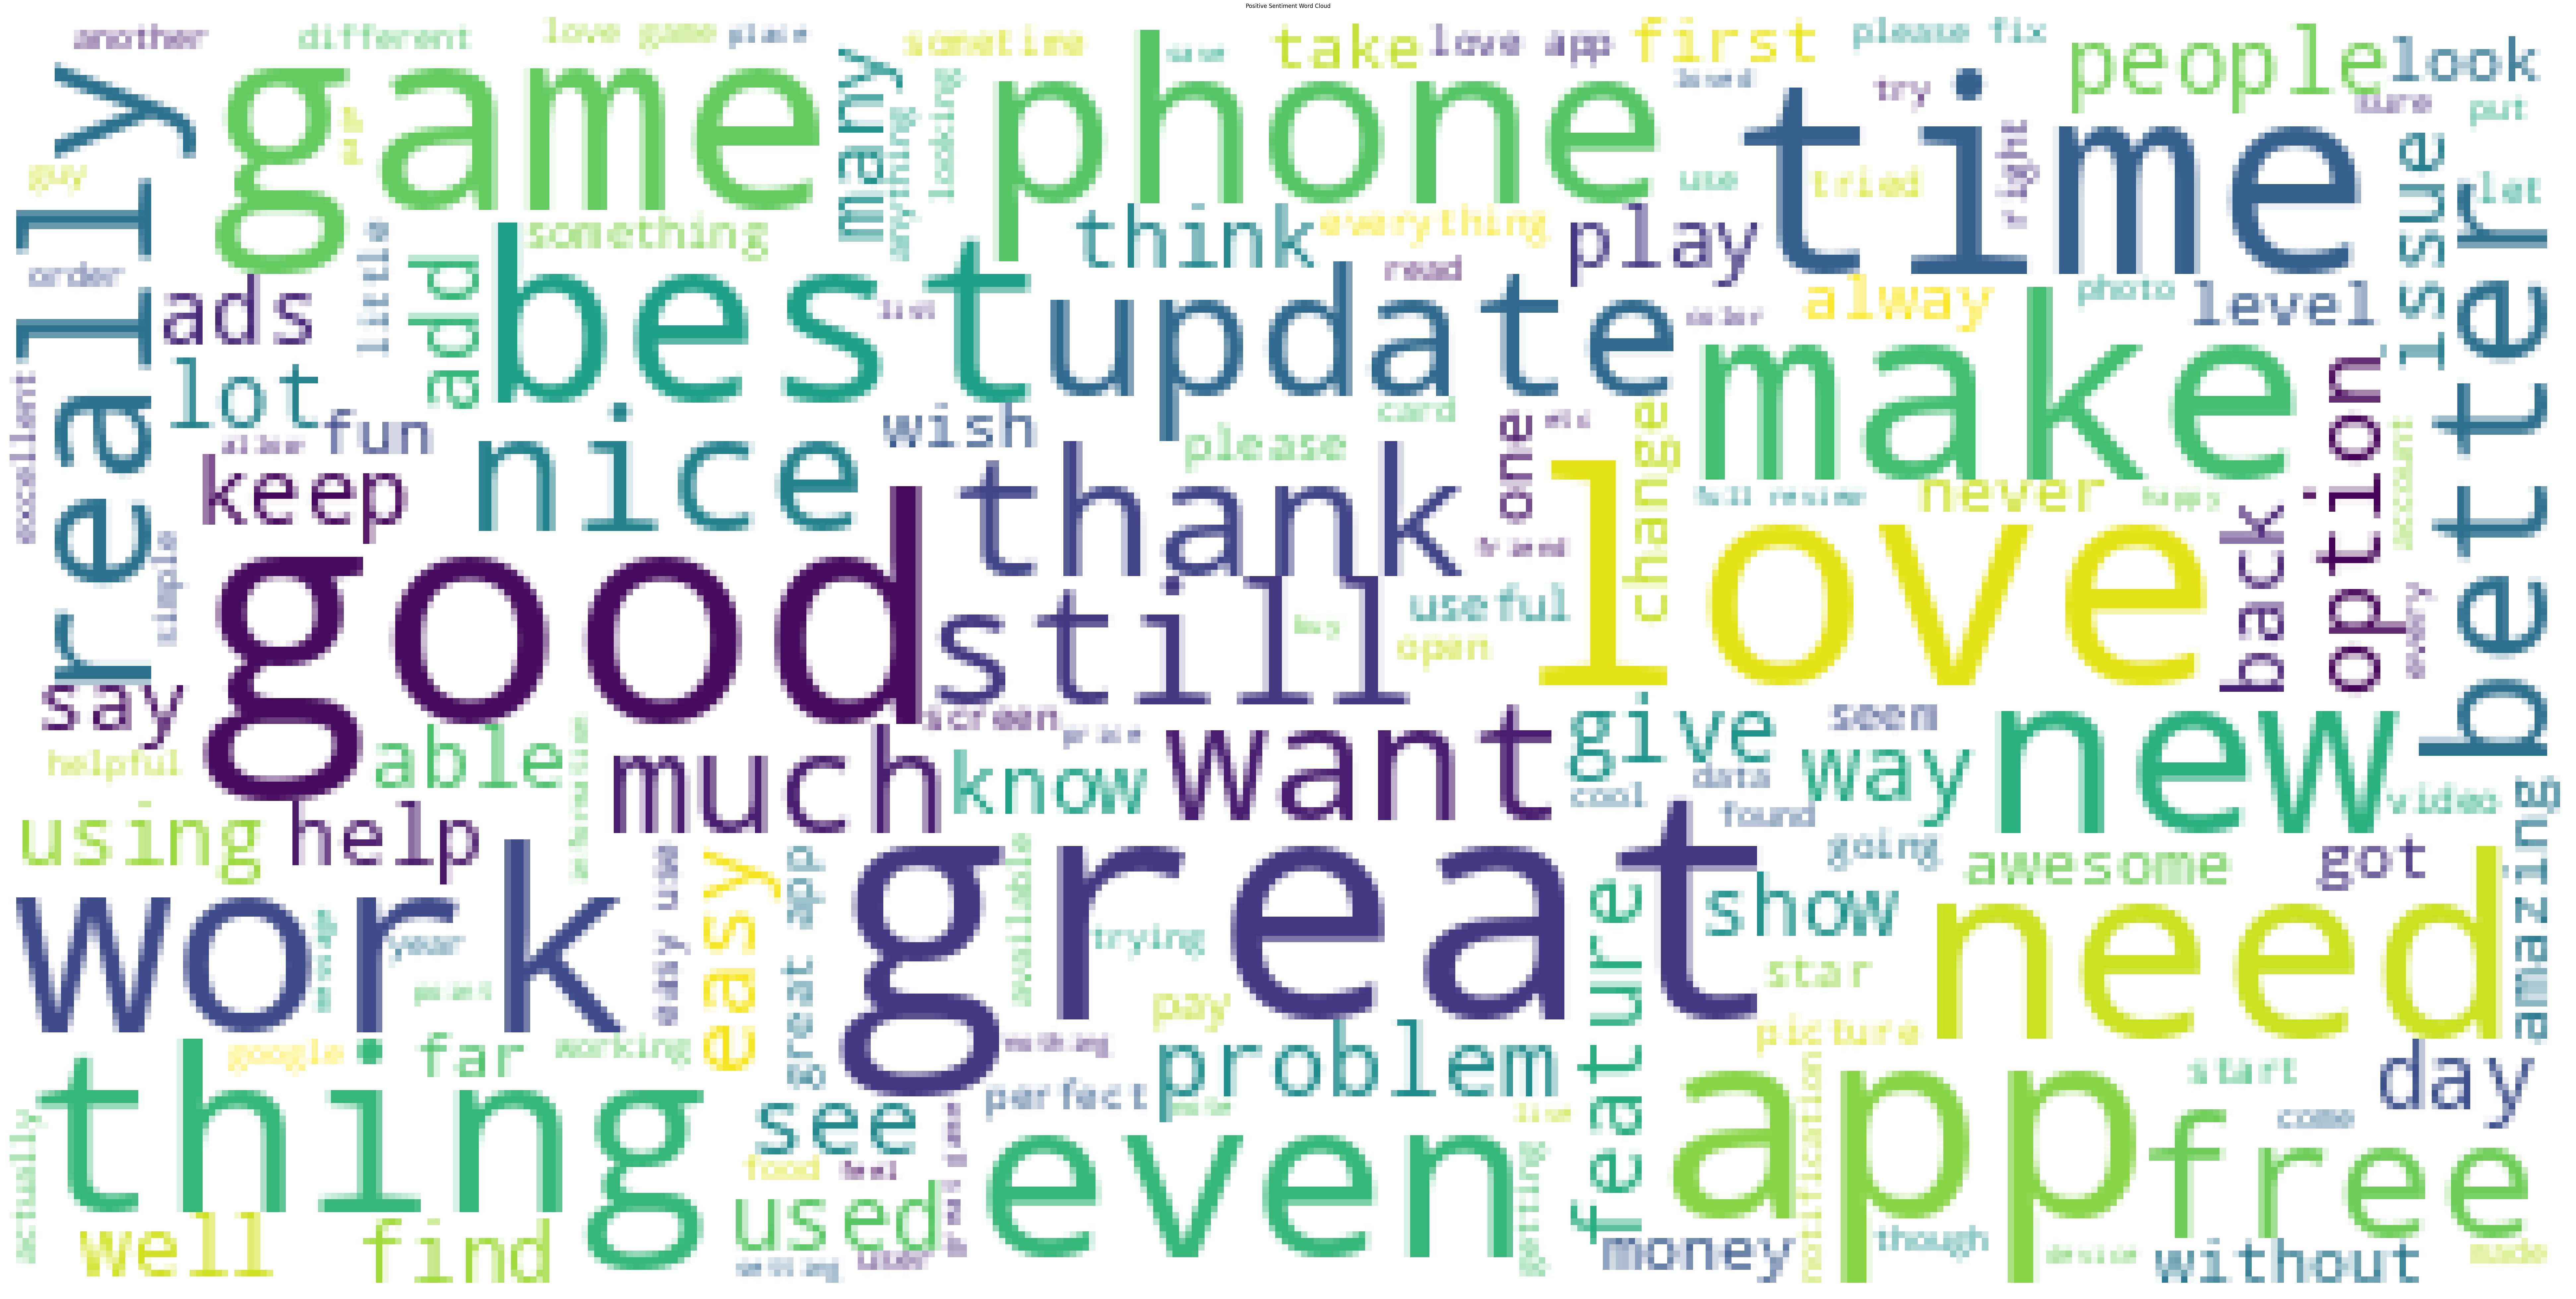

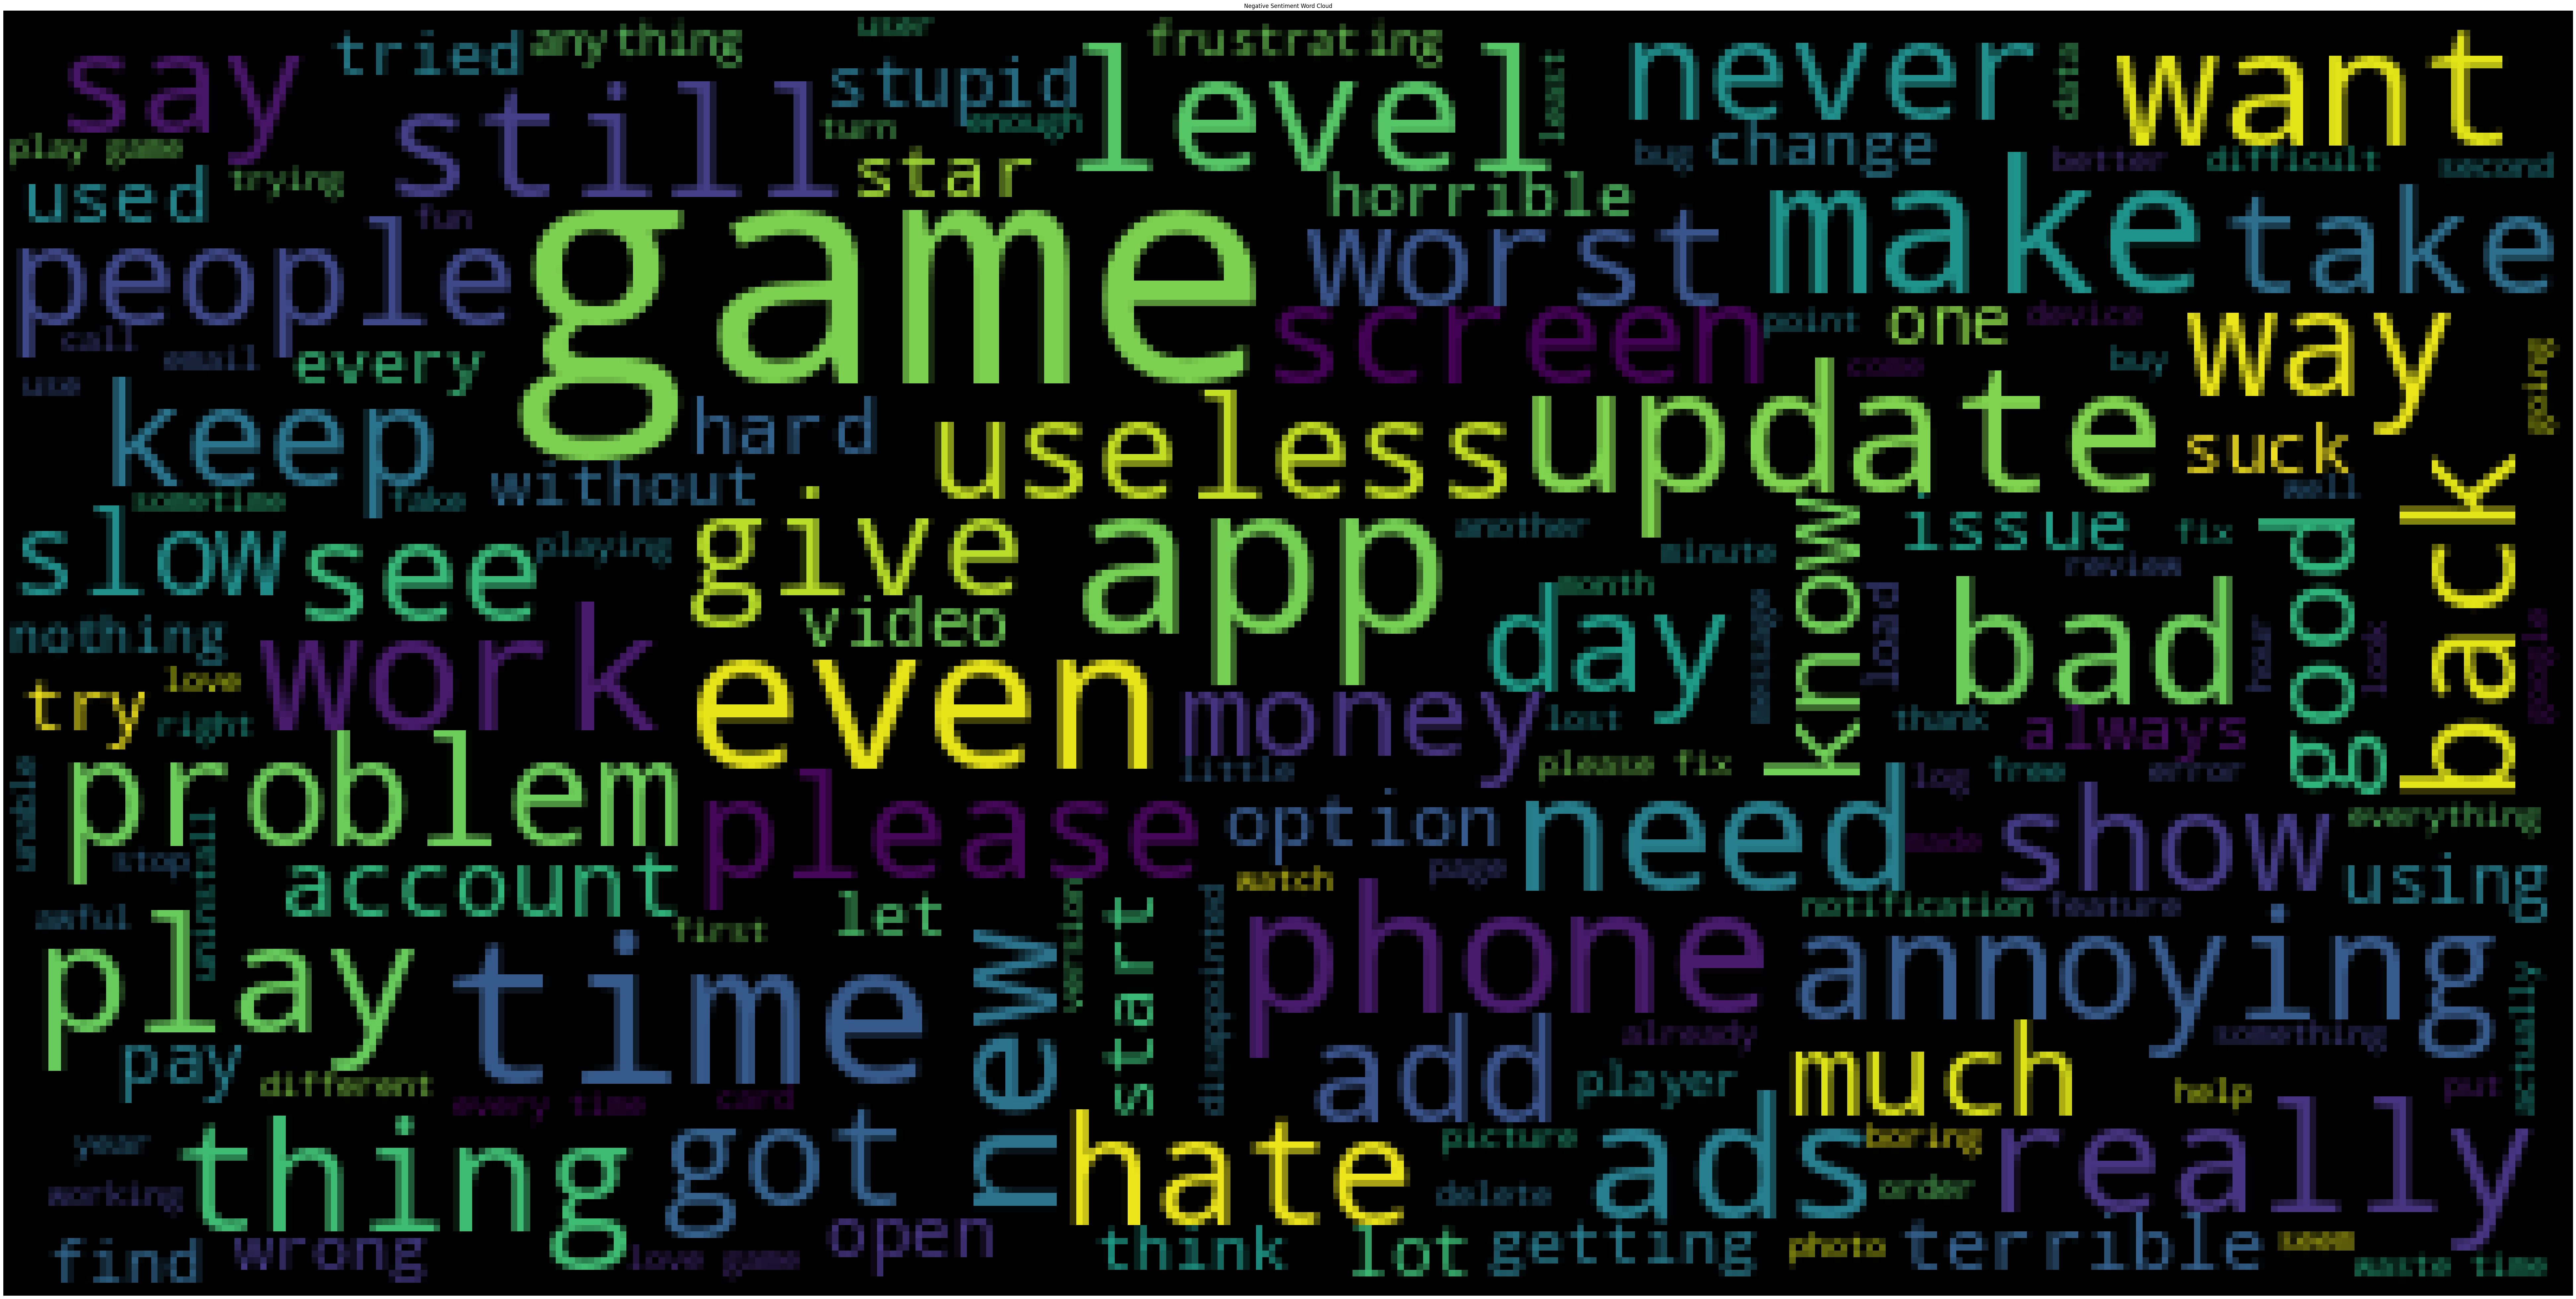

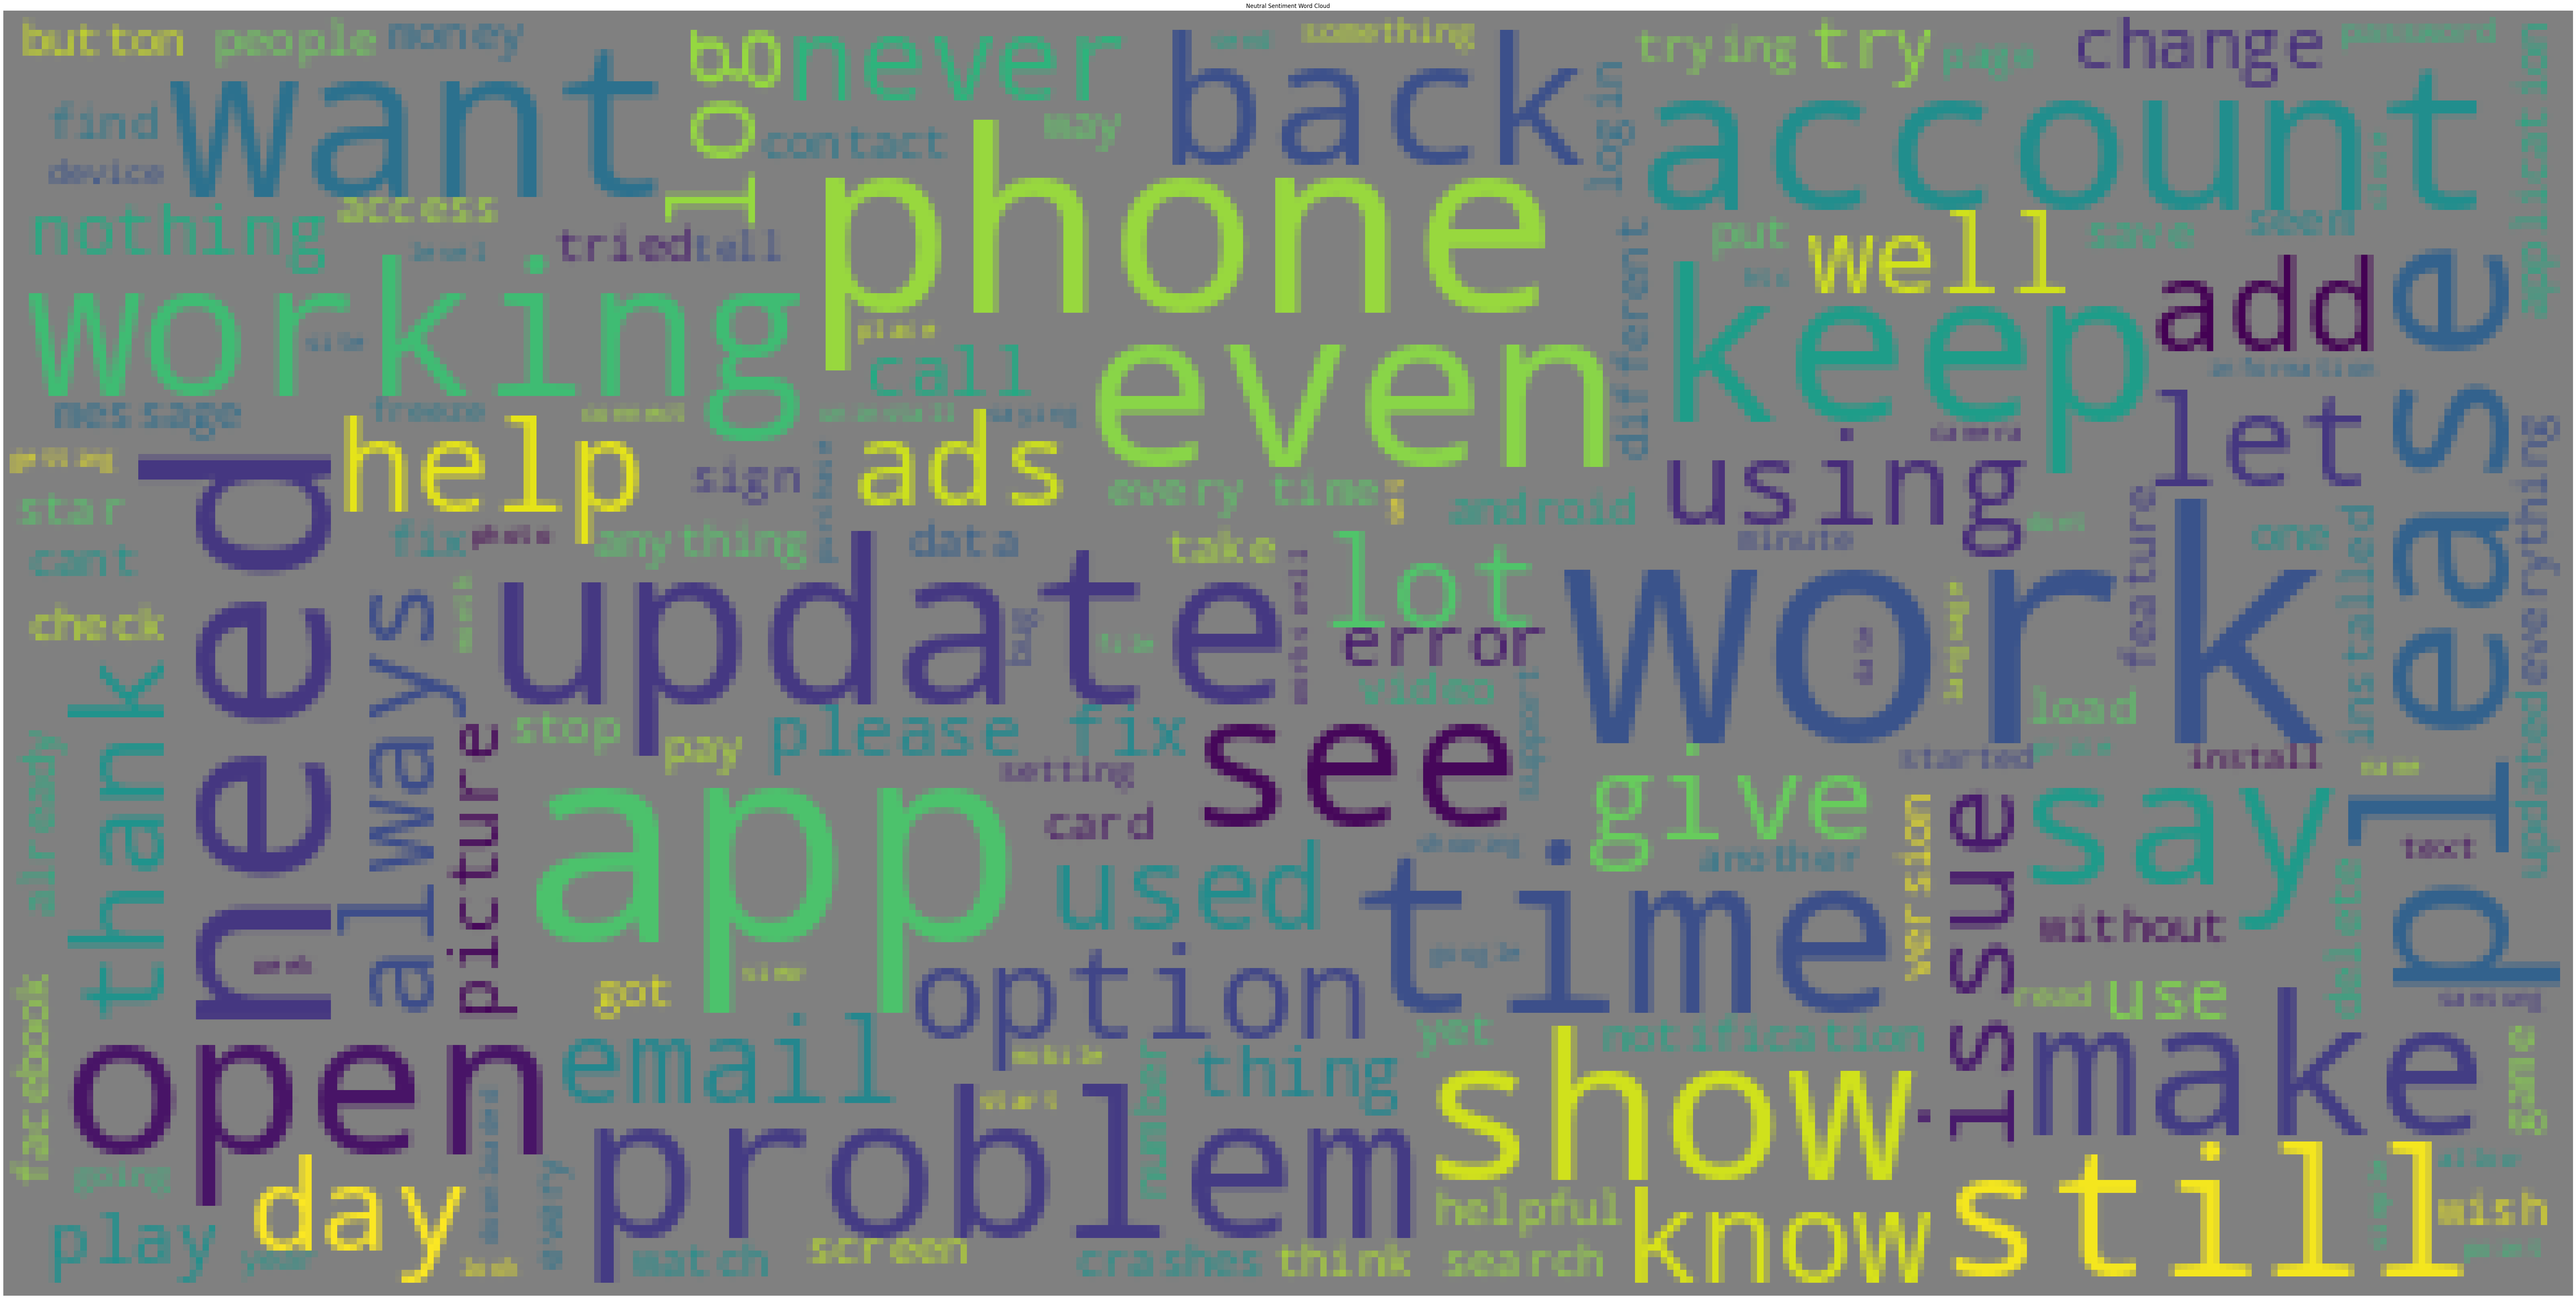

In [198]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!pip install stop-words


from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from stop_words import get_stop_words

def wc(data, bgcolor, title):
    plt.figure(figsize=(100, 100))
    wc = WordCloud(background_color=bgcolor, max_words=1000, max_font_size=50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)

# Assuming 'user' is your DataFrame
top_N = 100

pos_review_lower = user[user['Sentiment'] == 'Positive']['Translated_Review'].str.lower().str.cat(sep=' ')
neg_review_lower = user[user['Sentiment'] == 'Negative']['Translated_Review'].str.lower().str.cat(sep=' ')
neu_review_lower = user[user['Sentiment'] == 'Neutral']['Translated_Review'].str.lower().str.cat(sep=' ')

pos_review_remove_pun = re.sub('[^A-Za-z]+', ' ', pos_review_lower)
neg_review_remove_pun = re.sub('[^A-Za-z]+', ' ', neg_review_lower)
neu_review_remove_pun = re.sub('[^A-Za-z]+', ' ', neu_review_lower)

# Remove all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

pos_word_tokens_tags = word_tokenize(pos_review_remove_pun)
neg_word_tokens_tags = word_tokenize(neg_review_remove_pun)
neu_word_tokens_tags = word_tokenize(neu_review_remove_pun)

pos_filtered_sentence_tags = [w_tags for w_tags in pos_word_tokens_tags if not w_tags in stop_words]
neg_filtered_sentence_tags = [w_tags for w_tags in neg_word_tokens_tags if not w_tags in stop_words]
neu_filtered_sentence_tags = [w_tags for w_tags in neu_word_tokens_tags if not w_tags in stop_words]

# Remove characters which have length less than 2
pos_without_single_chr_rev = [word_tags for word_tags in pos_filtered_sentence_tags if len(word_tags) > 2]
neg_without_single_chr_rev = [word_tags for word_tags in neg_filtered_sentence_tags if len(word_tags) > 2]
neu_without_single_chr_rev = [word_tags for word_tags in neu_filtered_sentence_tags if len(word_tags) > 2]

# Remove numbers
pos_cleaned_data_rev = [word_tags for word_tags in pos_without_single_chr_rev if not word_tags.isnumeric()]
neg_cleaned_data_rev = [word_tags for word_tags in neg_without_single_chr_rev if not word_tags.isnumeric()]
neu_cleaned_data_rev = [word_tags for word_tags in neu_without_single_chr_rev if not word_tags.isnumeric()]

# Plot Word Clouds
wc(pos_cleaned_data_rev, 'white', 'Positive Sentiment Word Cloud')
wc(neg_cleaned_data_rev, 'black', 'Negative Sentiment Word Cloud')
wc(neu_cleaned_data_rev, 'gray', 'Neutral Sentiment Word Cloud')

plt.show()


# Regression in Machine Learning

## Overview

Regression is a type of supervised machine learning algorithm used for predicting continuous outcomes or values. It establishes a relationship between the dependent variable (target) and one or more independent variables (features). The goal is to understand how changes in the independent variables influence the dependent variable.

## Types of Regression

### 1. **Linear Regression:**
   - Assumes a linear relationship between the independent and dependent variables.
   - Equation: \(y = mx + b\), where \(y\) is the dependent variable, \(x\) is the independent variable, \(m\) is the slope, and \(b\) is the intercept.

### 2. **Multiple Linear Regression:**
   - Extension of linear regression for multiple independent variables.
   - Equation: \(y = b_0 + b_1x_1 + b_2x_2 + \ldots + b_nx_n\), where \(b_0\) is the intercept, \(b_1, b_2, \ldots, b_n\) are coefficients, and \(x_1, x_2, \ldots, x_n\) are independent variables.

### 3. **Polynomial Regression:**
   - Captures non-linear relationships by using polynomial equations.
   - Equation: \(y = b_0 + b_1x + b_2x^2 + \ldots + b_nx^n\).

### 4. **Ridge Regression and Lasso Regression:**
   - Regularized linear regression models that prevent overfitting by adding regularization terms to the cost function.
   - Introduce penalty terms for large coefficients.

## Steps in Regression Modeling

1. **Data Collection:**
   - Gather data containing both independent and dependent variables.

2. **Data Preprocessing:**
   - Handle missing values, outliers, and categorical variables.
   - Split the data into training and testing sets.

3. **Model Selection:**
   - Choose the appropriate regression model based on the nature of the problem.

4. **Model Training:**
   - Fit the model to the training data to learn the relationship between variables.

5. **Model Evaluation:**
   - Assess the model's performance on the testing data using metrics like Mean Squared Error (MSE), R-squared, etc.

6. **Prediction:**
   - Use the trained model to make predictions on new or unseen data.

## Applications

- Predicting house prices based on features like size, location, etc.
- Forecasting sales based on marketing expenditure.
- Predicting stock prices based on historical data.

Regression is a powerful tool for understanding and predicting numerical outcomes in various fields.


In [199]:
#app = app.drop(app.columns[4], axis=1)
app.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Size              1841
dtype: int64

In [200]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Installs        10357 non-null  int64  
 5   Type            10356 non-null  object 
 6   Price           10357 non-null  float64
 7   Content Rating  10357 non-null  object 
 8   Genres          10357 non-null  object 
 9   Size            8516 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.1+ MB


In [201]:
# The best way to fill missing values might be using the median instead of mean.
app['Rating'] = app['Rating'].fillna(app['Rating'].median())

# Calculate mean size for each category
category_mean_size = app.groupby('Category')['Size'].transform('mean')

# Replace null values in 'Size' with the mean values of their respective categories
app['Size'].fillna(category_mean_size, inplace=True)

# Now check if there are any remaining null values
app.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Size              0
dtype: int64

In [202]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int64  
 4   Installs        10357 non-null  int64  
 5   Type            10356 non-null  object 
 6   Price           10357 non-null  float64
 7   Content Rating  10357 non-null  object 
 8   Genres          10357 non-null  object 
 9   Size            10357 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.1+ MB


In [217]:
# App values encoding
le = preprocessing.LabelEncoder()
app['App'] = le.fit_transform(app['App'])
# This encoder converts the values into numeric values

# Category features encoding
category_list = app['Category'].unique().tolist()
category_list = ['cat_' + word for word in category_list]
app = pd.concat([app, pd.get_dummies(app['Category'], prefix='cat')], axis=1)

# Genres features encoding
le = preprocessing.LabelEncoder()
app['Genres'] = le.fit_transform(app['Genres'])

# Encode Content Rating features
le = preprocessing.LabelEncoder()
app['Content Rating'] = le.fit_transform(app['Content Rating'])

In [218]:
# Split data into training and testing sets
features = ['App', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating', 'Genres']
features.extend(category_list)
X = app[features]
y = app['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Columns: 106 entries, App to cat_MAPS_AND_NAVIGATION
dtypes: float64(2), int64(5), uint8(99)
memory usage: 1.9 MB


In [219]:
# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model with the training data
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [220]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.23121097000794838
Mean Absolute Error (MAE): 0.3245209937809786
R-squared: 0.02828483089402467


## Mean Squared Error (MSE): 0.23121097000794838

The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. In this case, the MSE value is 0.2312. A lower MSE indicates better model performance, as it suggests that the model's predictions are closer to the actual values on average.

---

## Mean Absolute Error (MAE): 0.3245209937809786

The Mean Absolute Error (MAE) is the average absolute difference between the predicted and actual values. Here, the MAE value is 0.3245. Like MSE, a lower MAE is desirable, indicating that, on average, the model's predictions deviate less from the actual values.

---

## R-squared: 0.02828483089402467

R-squared (or coefficient of determination) is a measure of how well the model explains the variability in the data. In this case, the R-squared value is 0.0283, which is relatively low. It means that only about 2.83% of the variability in the dependent variable is explained by the model. A higher R-squared value (closer to 1) indicates a better fit, suggesting that the model accounts for a larger proportion of the variance in the data.



In [221]:
# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)

In [222]:
# Find the mean accuracy of knn regression using X_test and y_test
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [223]:
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 6.21%'

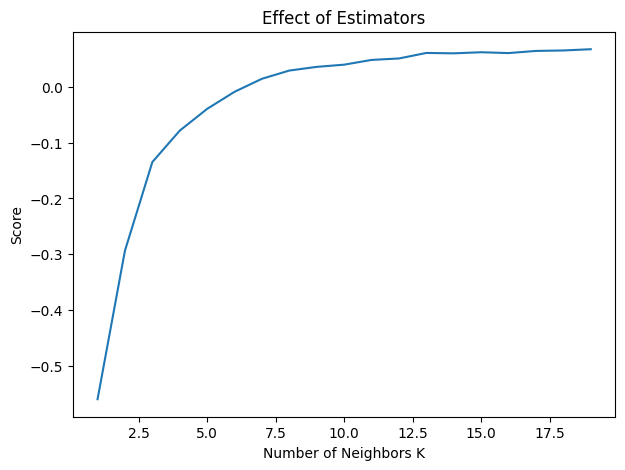

In [224]:
# Try different numbers of n_estimators - this will take a minute or so
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

[(10, 0.045355686446236),
 (20, 0.10275751094371743),
 (30, 0.10901904668693341),
 (40, 0.12018534451851481),
 (50, 0.13361893246153433),
 (60, 0.1271989020357006),
 (70, 0.1240728536655683),
 (80, 0.12415576465793754),
 (90, 0.12334334335797681),
 (100, 0.12753100406786388),
 (110, 0.13197816759680348),
 (120, 0.1365818392262771),
 (130, 0.13648709558943284),
 (140, 0.12815530720904866),
 (150, 0.138005147262249),
 (160, 0.1344802000351838),
 (170, 0.13253615704651756),
 (180, 0.13108782415498743),
 (190, 0.13243787299087273)]

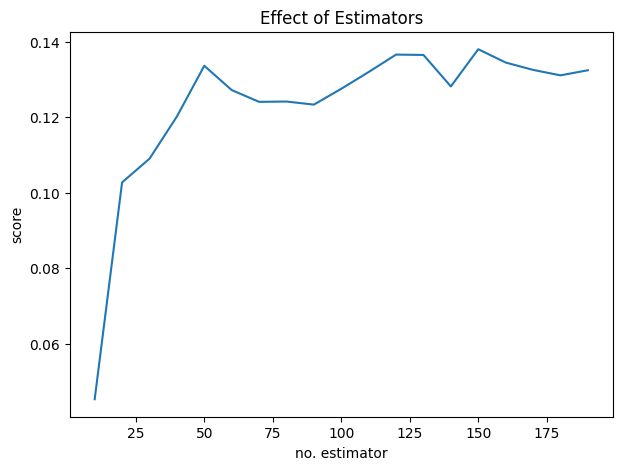

In [225]:
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [226]:
predictions = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.29107396870554786
Mean Squared Error: 0.2064286812693184
Root Mean Squared Error: 0.4543442321294707
